<a href="https://colab.research.google.com/github/mahendra49/random/blob/main/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Applied AI - FINAL PROJECT
DATASET : https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction

# PROBLEM STATEMENT
Cardiovascular diseases (CVDs) are the leading cause of death worldwide, claiming the lives of an estimated 17.9 million people each year. Heart attacks and strokes account for more than four out of every five CVD deaths, and one-third of these deaths occur in people under the age of 70.
Identifying those at the highest risk of CVDs and ensuring they receive appropriate treatment can save lives. 

# LOAD AND PROCESS DATA : Pre-process data

import related libraries

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

##summary of data

In [ ]:
df = pd.read_csv('heart.csv')
print("shape of the data : {}".format(df.shape))
df.head()

shape of the data : (918, 12)


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


data format of each attribute

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


##Clean data

In [ ]:
df.isnull().sum(axis=0)

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

drop rows having NULL values

In [ ]:
df = df.dropna()

## any anomaly in data ?

In [ ]:
df.duplicated().value_counts()

False    918
dtype: int64

we don't have duplicated rows

seperate Features and class label

In [ ]:
#all Features 
features = df.drop(columns=['HeartDisease'])

#final label
label = df["HeartDisease"]

features

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up
...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat


Set of colums having categorial values

In [ ]:
cat_cols = [col for col in features.columns if col not in features.describe().columns]
cat_cols

['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

drop columns having NULL values

In [ ]:
df = df.dropna()

## Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

categorical_values = cat_cols

for i in categorical_values:
  le.fit(features[i])
  features[i] = le.transform(features[i])

features

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,1,1,140,289,0,1,172,0,0.0,2
1,49,0,2,160,180,0,1,156,0,1.0,1
2,37,1,1,130,283,0,2,98,0,0.0,2
3,48,0,0,138,214,0,1,108,1,1.5,1
4,54,1,2,150,195,0,1,122,0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110,264,0,1,132,0,1.2,1
914,68,1,0,144,193,1,1,141,0,3.4,1
915,57,1,0,130,131,0,1,115,1,1.2,1
916,57,0,1,130,236,0,0,174,0,0.0,1


## Normalize Data

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(features)
data_scaled = scaler.transform(features)
data_scaled

array([[-1.4331398 ,  0.51595242,  0.22903206, ..., -0.8235563 ,
        -0.83243239,  1.05211381],
       [-0.47848359, -1.93816322,  1.27505906, ..., -0.8235563 ,
         0.10566353, -0.59607813],
       [-1.75135854,  0.51595242,  0.22903206, ..., -0.8235563 ,
        -0.83243239,  1.05211381],
       ...,
       [ 0.37009972,  0.51595242, -0.81699495, ...,  1.21424608,
         0.29328271, -0.59607813],
       [ 0.37009972, -1.93816322,  0.22903206, ..., -0.8235563 ,
        -0.83243239, -0.59607813],
       [-1.64528563,  0.51595242,  1.27505906, ..., -0.8235563 ,
        -0.83243239,  1.05211381]])

# Visualization


## Data is balanced ?

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


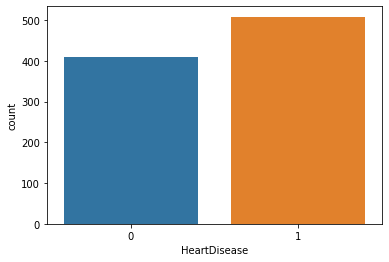

In [ ]:
sns.countplot(label)

1 in class label represets that the person has heart-disease and 0 represents no disease.

we can see that there is not much difference between the class which we are predicting.

## pair wise plots

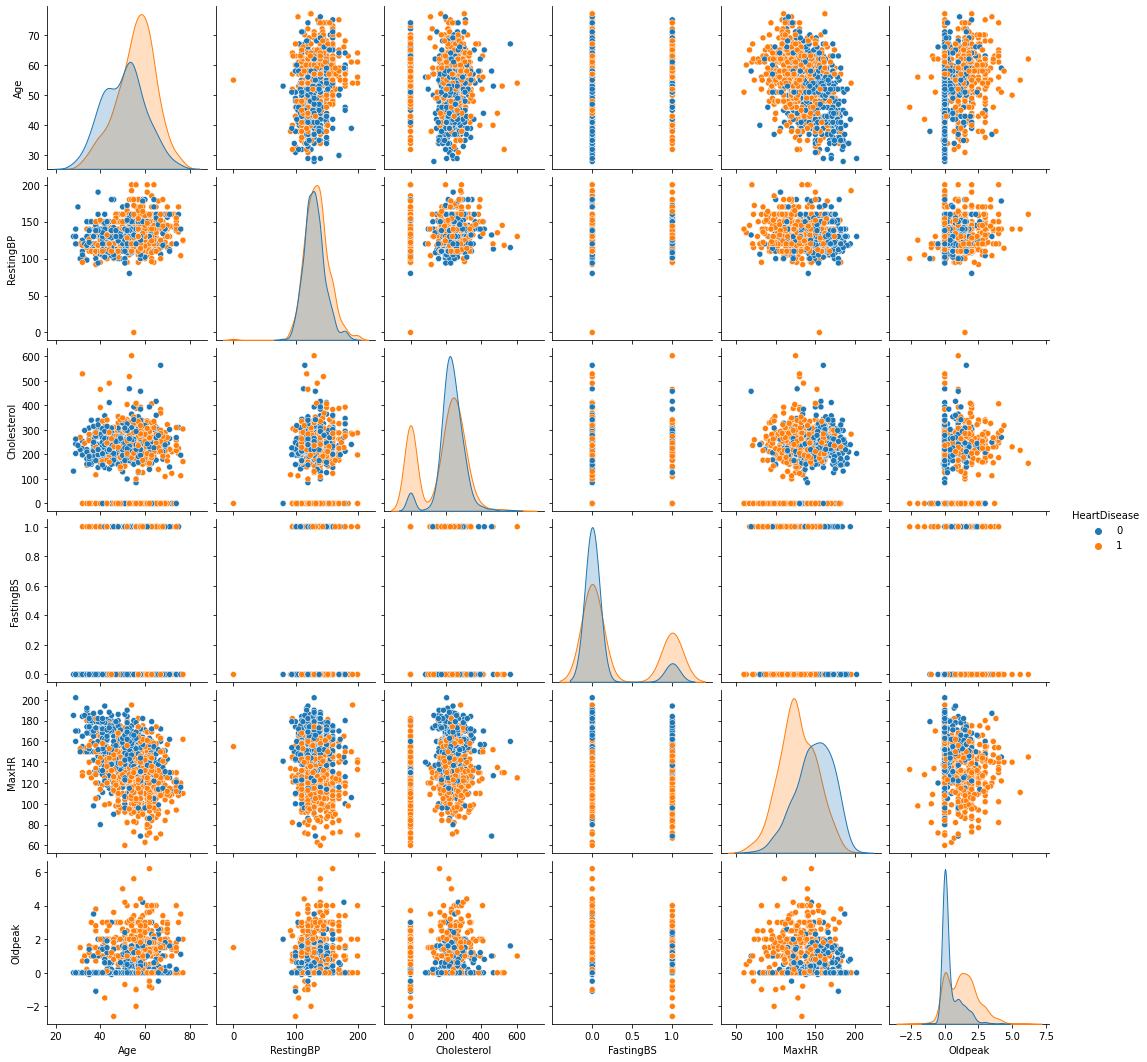

In [ ]:
sns.pairplot(df, hue="HeartDisease")

So we harldy have feature pairs that are highly corelared.

## All plots

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


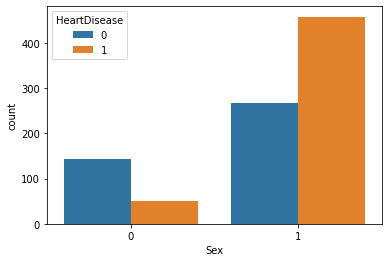

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


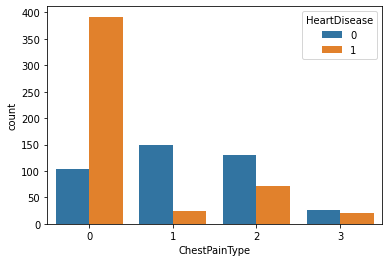

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


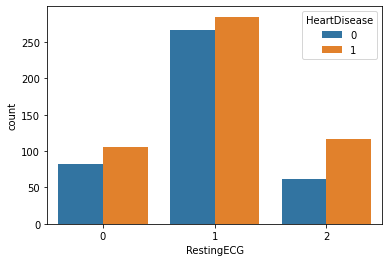

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


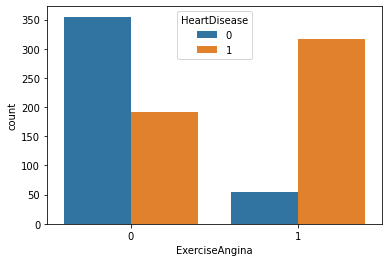

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


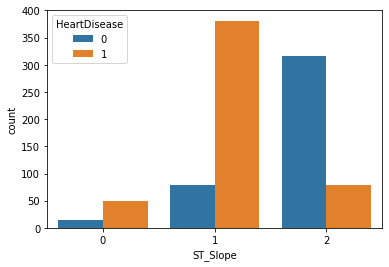

In [ ]:
for i in cat_cols:
  sns.countplot(i,data=features,hue=label)
  plt.show()

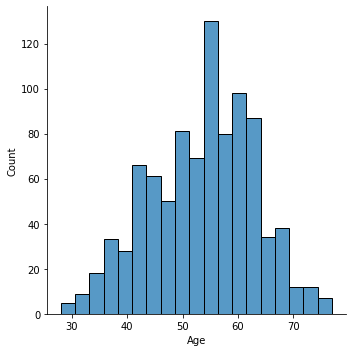

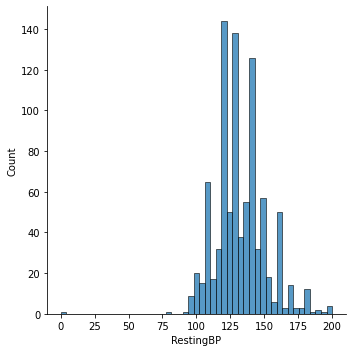

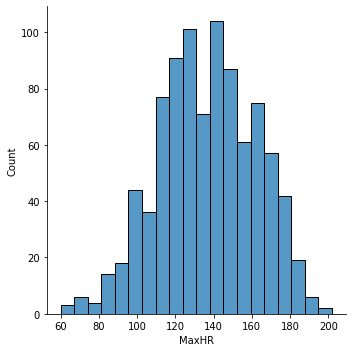

In [ ]:
#distrbution for numberic data

sns.displot(df['Age'])
sns.displot(df['RestingBP'])
sns.displot(df['MaxHR'])

Age and MaxHR features follows distribution similar to gaussian

In [ ]:
df.duplicated().value_counts()

False    918
dtype: int64

## Correlation Matrix

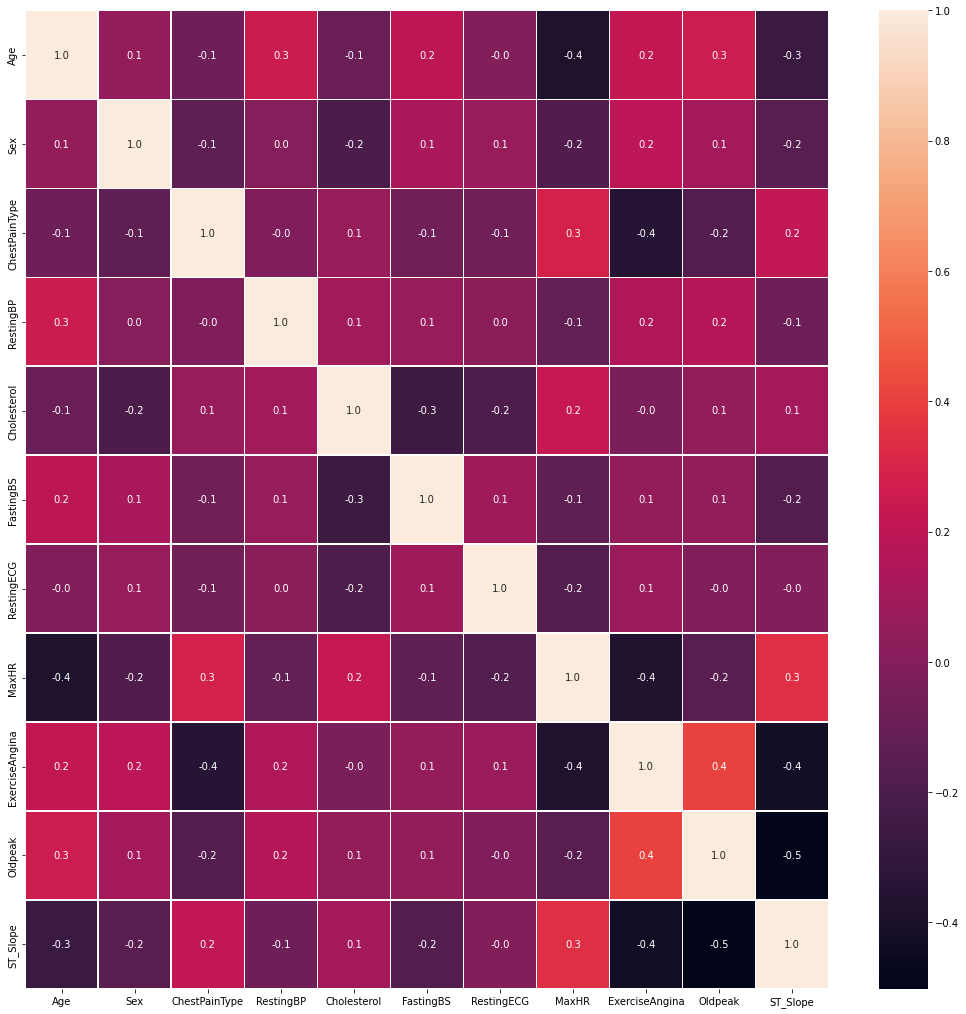

In [ ]:
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(features.corr(),annot=True, linewidths=.5, fmt= '.1f',ax=ax)

# Model Selection


##Split into Train and Test Data

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import NearestCentroid
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,plot_confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(data_scaled, label, test_size=0.25)


## Evaluate all models (Logistic Regression, MDC classifier, K-nearest, SVM)

In [ ]:
model_names = [
    'Logistic Regression',
    'MDC Classifier',
    'K-Nearest Neighbors',
    'SVM'
]

models = [
    LogisticRegression(),
    NearestCentroid(),
    KNeighborsClassifier(n_neighbors=2),
    SVC(kernel='linear')
]


In [ ]:
#evaluate model and print report
def model_train_report(model, model_name ,X_train, X_test, y_train, y_test):
    model = model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    
    print('Accuracy: ',accuracy_score(y_test, y_pred))
    print('f1_score: ', f1_score(y_test, y_pred, average='weighted'))
    print('Precision: ', precision_score(y_test, y_pred, average='weighted'))
    print('Recall: ', recall_score(y_test, y_pred, average='weighted'))
    plot_confusion_matrix(model, X_test, y_test)
    plt.plot()
    plt.show()
    print("-----------------------------------------------------------------------------------------------------")
    print("\n\n\n\n")

##Results (model metrics and Confusion matrix)

Model Name: Logistic Regression : metrics

Accuracy:  0.8304347826086956
f1_score:  0.8306821636075614
Precision:  0.8324674513208564
Recall:  0.8304347826086956


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


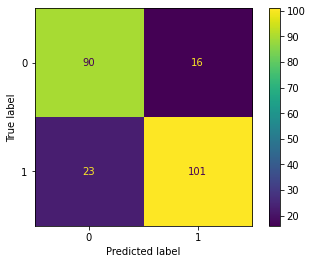

-----------------------------------------------------------------------------------------------------





Model Name: MDC Classifier : metrics

Accuracy:  0.8043478260869565
f1_score:  0.8044107022652685
Precision:  0.8133054512178604
Recall:  0.8043478260869565


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


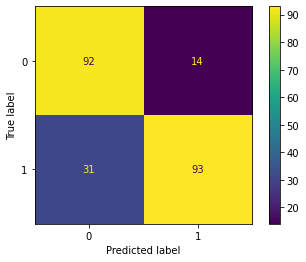

-----------------------------------------------------------------------------------------------------





Model Name: K-Nearest Neighbors : metrics

Accuracy:  0.7956521739130434
f1_score:  0.7952077294685991


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Precision:  0.810902768739968
Recall:  0.7956521739130434


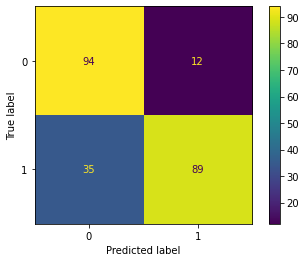

-----------------------------------------------------------------------------------------------------





Model Name: SVM : metrics

Accuracy:  0.8304347826086956
f1_score:  0.8304895735971897
Precision:  0.8305758449701522
Recall:  0.8304347826086956


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


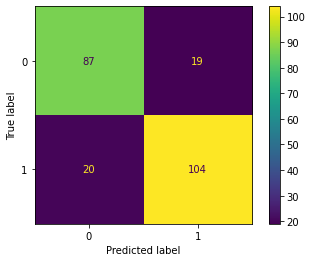

-----------------------------------------------------------------------------------------------------







In [ ]:
#run all models
for model_name, model in zip(model_names, models):
    print('Model Name: {} : metrics\n'.format(model_name))
    model_train_report(model, model_name, X_train, X_test, y_train, y_test)

## Neural Network

In [ ]:
from sklearn.neural_network import MLPClassifier
MLP_model = MLPClassifier(activation='logistic', hidden_layer_sizes=(100, 50), max_iter=1000, solver='lbfgs')
MLP_model.fit(X_train, y_train)

MLP_Pred = MLP_model.predict(X_test)

neural net results

In [ ]:
print('Neural net model results : ')
print('Accuracy: ',accuracy_score(y_test, MLP_Pred))
print('f1_score: ',f1_score(y_test, MLP_Pred, average= 'weighted'))
print('Precision: ', precision_score(y_test, MLP_Pred, average= 'weighted'))
print('Recall: ', recall_score(y_test, MLP_Pred, average= 'weighted'))

Neural net model results : 
Accuracy:  0.8130434782608695
f1_score:  0.8126329457142312
Precision:  0.8129984282553635
Recall:  0.8130434782608695


consufion matrix for neural networks.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


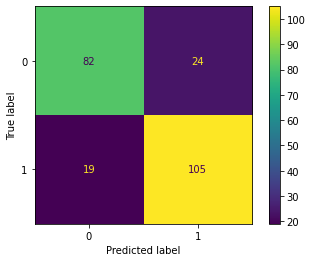

In [ ]:
plot_confusion_matrix(MLP_model, X_test, y_test)

# Comparing models

*  Tested Logistic regression, MDC classifier, K-nearest neighbour, SVM, and neural network.
*  SVM model has the highest F1-score for this dataset.
*  all models give around 85-90% accuracy, one reason for this maybe the fact that the data size is small. Neural networks may perform better in this case if we have more data.
*  Also we can build pipleline having 2 models and see the performace.